In [1]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load embeddings model
json_file = open('NN_embed_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("NN_embed_model.h5")
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


In [13]:
prod_embed = loaded_model.layers[2].get_weights()[0]

In [20]:
import numpy as np
np.isnan(prod_embed)

array([[False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

In [4]:
folder = 'C:\\Users\\Pascal\\Documents\\GitHub\\instacart-market-basket-analysis\\'

df_use = pd.read_csv(folder + 'data1000.csv')

In [5]:
#Helper to index columns before embeddings
def val2idx(df, cols):
    val_types = dict()
    for c in cols:
        val_types[c] = df[c].unique()

    val_to_idx = dict()
    for k, v in val_types.items():
        val_to_idx[k] = {o: i for i, o in enumerate(val_types[k])}

    for k, v in val_to_idx.items():
        df[k] = df[k].apply(lambda x: v[x]+1)

    unique_vals = dict()
    for c in cols:
        unique_vals[c] = df[c].nunique()

    return df, val_to_idx

In [6]:
df_deep, id_dict = val2idx(df_use, ['product_id'])

In [7]:
depts = df_use[['product_id', 'department']]

In [8]:
dept_use = depts.ix[:19039,1]

C:\Users\Pascal\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [9]:
dept_use.nunique()

21

In [10]:
prod_dim_rec = TSNE(n_components=2).fit_transform(prod_embed)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [11]:
df_use['department'].shape

(346377,)

In [12]:
# Plot...
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(prod_dim_rec[:,0], prod_dim_rec[:,1],s=50)

NameError: name 'prod_dim_rec' is not defined

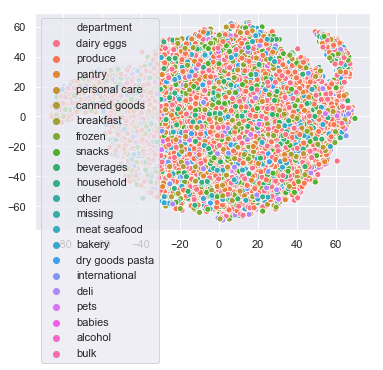

In [45]:
import seaborn as sns; sns.set()
sns.scatterplot(x=prod_dim_rec[:,0], y=prod_dim_rec[:,1], hue=dept_use)